pip install scikit-learn 가상화환경에 설치
pip install scipy

In [ ]:
# !pip uninstall scikit-learn
# !pip install scikit-learn

In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
# !pip install numpy==1.26.4

In [1]:
import sklearn
sklearn.__version__

'1.6.0'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('./data/LinearRegressionData.csv')

In [7]:
dataset.head()  # head() - 데이터 상위 5개까지만 보여주는 함수

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [9]:
# 독립변수와 종속 변수의 관계를 인과관계라고 한다. 인과관계는 상관관계에 포함된다.  예) 온도(독립변수)에 의해 수확량(종속변수)이 달라진다.
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수 - 원인)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [17]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

# 선형회귀 모델 생성

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [23]:
y_pred = reg.predict(X) # X 에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

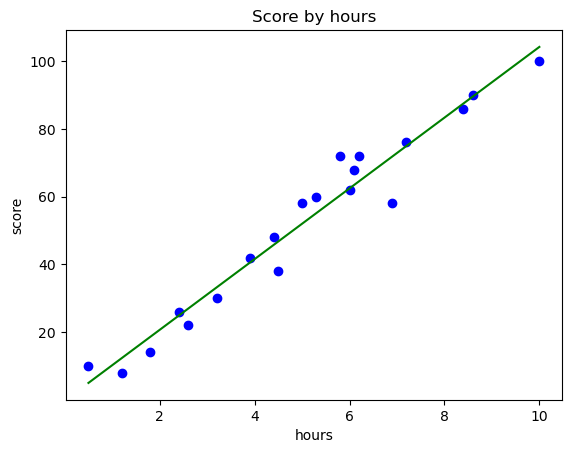

In [25]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, y_pred, color='green') # 예측 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [33]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # 2차원 배열 형태로 -> [[9], [8], [7]] 9시간 8시간 7시간을 조사할 때

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [37]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [39]:
reg.intercept_ # y 절편 (b)

-0.21848470286721522

우리의 식<br/>
y = mx + b  -> y = 10.4436x - 0.2184

### 데이터 세트 분리
머신러닝에서 이미 가지고  있는 데이터를 가지고 모델을 평가 하기 위해서 데이터 세트를 분리하는 작업을 한다.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset = pd.read_csv('./data/LinearRegressionData.csv')

In [47]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [49]:
X = dataset.iloc[:, :-1].values  # 독립변수
y = dataset.iloc[:, -1].values # 종속 변수

In [51]:
from sklearn.model_selection import train_test_split # 테스트 세트 분리

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련 80 : 테스트 20 으로 분리 - test_size=0.2 가 20%를 말함

In [55]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [57]:
X_train, len(X_train) # 훈련 세트 X, 개수 -> 80% 이므로 16개

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [59]:
X_test, len(X_test) # 테스트 세트 X, 개수 -> 20% 이므로 4개

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [61]:
y, len(y) # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [63]:
y_train, len(y_train) # 훈련 세트 y -> 80% 이므로

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [65]:
y_test, len(y_test) # 테스트 세트 y -> 20%

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [68]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [70]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

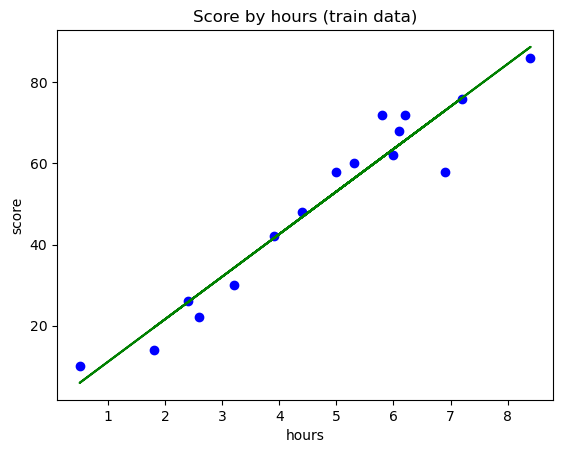

In [73]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

### 데이터 시각화 (테스트 세트)

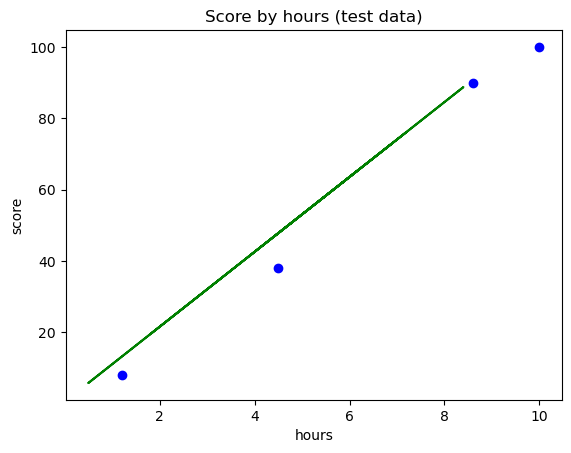

In [76]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프 -> 모델을 가지고 만들었기 때문에 그대로 사용
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [78]:
reg.coef_ # 기울기 -> 위에는 array([10.49161294])

array([10.49161294])

In [80]:
reg.intercept_ # y 절편 -> 위에는 0.6115562905169796

0.6115562905169796

### 모델 평가

In [83]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가 -> 97점 정도의 점수

0.9727616474310156

In [86]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가 -> 93.56점 정도의 점수

0.9356663661221668

경사하강법은 선형회귀의 y = ax + b를 구하기 위한 최적화 알고리즘 중 하나이다.

## 경사 하강법 (Gradient Descent)

In [89]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법

sr = SGDRegressor() # 객체 생성
sr.fit(X_train, y_train)

SGDRegressor()

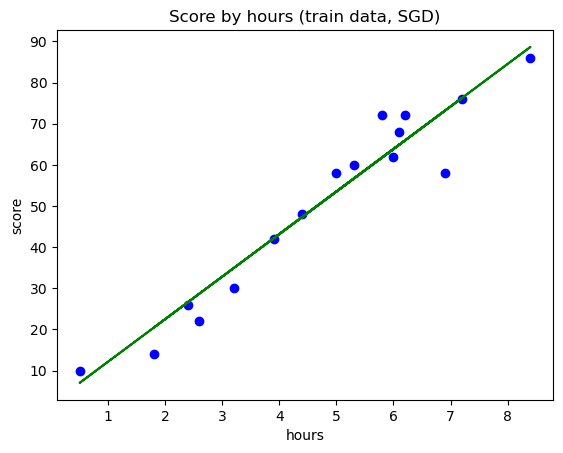

In [91]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [93]:
sr.coef_, sr.intercept_
# 주의 : SGDRegressor() 객체를 생성할 때 random_state 값을 지정하지 않았으므로 결과가 다르게 나타날 수 있습니다
# 위에서의 값은 array([10.49161294]) 0.6115562905169796

(array([10.33627454]), array([1.82505539]))

In [95]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9695455815049887

In [97]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9350228955313822

### 훈련 회수를 정한 경사 하강법
max_iter : 훈련 세트 반복 횟수 (Epoch 횟수) 많을 수로 손실률이 적어짐

eta0 : 학습률 (learning rate)

In [115]:
"""scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용합니다.

train_test_split(..., test_size=0.2) 과 같은 함수는 80% train, 20% test 데이터 세트를 추출합니다. 하지만 추출된 데이터는 수행을 할때마다 다를수 있습니다. 
random하게 80%, 20%를 추출하기 때문입니다.

가령 1~ 100까지 일련번호로 된 100개의 데이터를 train_test_split(.., test_size=0.2) 로 수행하면 해당 함수를 첫번째 수행할 때는 1~80 번이 train, 81~100번이 
test가 될 수 있지만, 다시 수행하면 이번에 21~100번이 train, 1~20번이 test가 될 수 있습니다. 80%, 20% 로 나누는건 동일하지만 함수를 수행 시마다 추출한 레코드들을 
달라질수 있습니다. 내부적으로 80%, 20% 로 나눌때 random 함수를 적용합니다.

random_state=1 이라고 하면 바로 이 random 함수의 seed 값을 고정시키기 때문에 여러번 수행하더라도 같은 레코드를 추출합니다. random 함수의 seed값을 
random_state라고 생각하시면 됩니다.

제가 강의에 사용된 train/test 데이터세트를 여러분도 동일하게 사용할 수 있도록 random_state를 고정값으로 할당했습니다. 그렇지 않으면 제가 설명드리는 
데이터 세트와 여러분이 수행하는 데이터 세트는 80%, 20%는 맞더라도 서로 다른 레코드로 추출되기 때문입니다.

random_state를 어떤 값으로 하셔도 상관없습니다.  이는 random값을 고정하는 역할만 수행합니다."""

'scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용합니다.\n\ntrain_test_split(..., test_size=0.2) 과 같은 함수는 80% train, 20% test 데이터 세트를 추출합니다. 하지만 추출된 데이터는 수행을 할때마다 다를수 있습니다. random하게 80%, 20%를 추출하기 때문입니다.\n\n가령 1~ 100까지 일련번호로 된 100개의 데이터를 train_test_split(.., test_size=0.2) 로 수행하면 해당 함수를 첫번째 수행할 때는 1~80 번이 train, 81~100번이 test가 될 수 있지만, 다시 수행하면 이번에 21~100번이 train, 1~20번이 test가 될 수 있습니다. 80%, 20% 로 나누는건 동일하지만 함수를 수행 시마다 추출한 레코드들을 달라질수 있습니다. 내부적으로 80%, 20% 로 나눌때 random 함수를 적용합니다.\n\nrandom_state=1 이라고 하면 바로 이 random 함수의 seed 값을 고정시키기 때문에 여러번 수행하더라도 같은 레코드를 추출합니다. random 함수의 seed값을 random_state라고 생각하시면 됩니다.\n\n제가 강의에 사용된 train/test 데이터세트를 여러분도 동일하게 사용할 수 있도록 random_state를 고정값으로 할당했습니다. 그렇지 않으면 제가 설명드리는 데이터 세트와 여러분이 수행하는 데이터 세트는 80%, 20%는 맞더라도 서로 다른 레코드로 추출되기 때문입니다.\n\nrandom_state를 어떤 값으로 하셔도 상관없습니다.  이는 random값을 고정하는 역할만 수행합니다.'

In [109]:
# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)

# 훈련세트를 반복하면서 손실이 어떻게 줄어드는지 보여준다. max_iter 수치를 변경해서 그래프로 확인 할 것.
sr = SGDRegressor(max_iter=100, eta0=1e-4, random_state=0)  # verbose=1 수치를 나타냄.
# random_state는 그냥 데이터를 어떤 순서로 섞을까요? 이런 의미이다. 0으로 하면 그냥 원래 데이터 순서대로 가는거고 100으로 하면 100번째 데이터부터 
시작해서 섞이는 식이다.

sr.fit(X_train, y_train)

C:\Dev\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100, random_state=0)

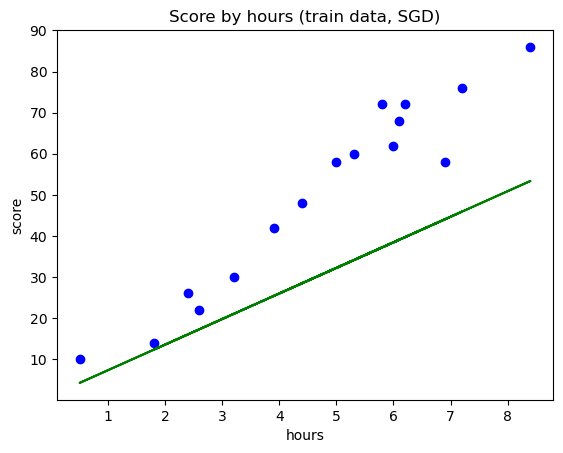

In [111]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()